<a href="https://colab.research.google.com/github/Rhitabrat/deep-learning-CS510/blob/main/hw4/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW4

References

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

https://smorbieu.gitlab.io/accuracy-from-classification-to-clustering-evaluation/

In [47]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow as tf
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [26]:
(X_train_ori, y_train), (X_test_ori, y_test) = keras.datasets.mnist.load_data()
assert X_train_ori.shape == (60000, 28, 28)
assert X_test_ori.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [27]:
def select_data(n, X_train, y_train):
    classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    indices_all_classes = []

    for each_class in classes:
        indices = [i for i, x in enumerate(y_train) if x == each_class]
        indices_all_classes.append(indices)

    new_X_train = []
    new_y_train = []

    for class_indices in indices_all_classes:
        x, y = X_train[class_indices[:n]], y_train[class_indices[:n]]
        new_X_train.extend(x)
        new_y_train.extend(y)

    return np.array(new_X_train), np.array(new_y_train)

In [28]:
def prepare_data(X_train, y_train):
    # X_train = np.expand_dims(X_train, axis=-1)
    # X_train = np.repeat(X_train, 3, axis=-1)
    X_train = X_train.astype('float32') / 255
    # X_train = tf.image.resize(X_train, [224, 224])
    # y_train = tf.keras.utils.to_categorical(y_train , num_classes=10)
    return X_train, y_train

In [29]:
def shuffle_data(X_train, y_train, N):
    indices = tf.range(start=0, limit=10*N, dtype=tf.int32)
    shuffled_indices = tf.random.shuffle(indices)

    shuffled_x = tf.gather(X_train, shuffled_indices)
    shuffled_y = tf.gather(y_train, shuffled_indices)
    return shuffled_x.numpy(), shuffled_y.numpy()

# QN 1

Pick 100 samples from each of the 10 classes. Take all these 1,000 images and run them through a k-means clustering algorithm (k=10).

In [49]:
# Nx10 data - 10 from each category

N=100
X_train_100, y_train_100 = select_data(N, X_train_ori, y_train)
X_train_100, y_train_100 = prepare_data(X_train_100, y_train_100)
X_train_100, y_train_100 = shuffle_data(X_train_100, y_train_100, N)

X_train_100 = X_train_100.reshape(len(X_train_100), -1)
X_train_100.shape

(1000, 784)

## Kmeans

In [73]:
kmeans = KMeans(init="k-means++", n_clusters=10, random_state=0).fit(X_train_100)
predicted_labels = kmeans.labels_

## Accuracy

In [74]:
cm = confusion_matrix(y_train_100, predicted_labels)

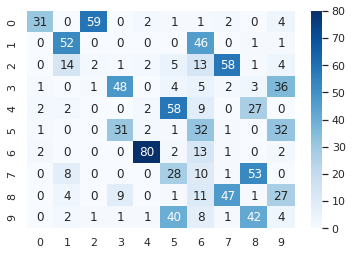

In [75]:
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [90]:
np.trace(cm) / np.sum(cm)

0.155

*Kmeans gives you cluster numbers that are different from the class labels. You have to convert those clusters numbers to their corresponding class labels, i.e if for example, if more than  50% of images in cluster 1 are from class 5, that cluster should be reassigned number 5.* - from TA

In [91]:
def linear_assignment(cost_matrix):
  try:
    import lap
    _, x, y = lap.lapjv(cost_matrix, extend_cost=True)
    return np.array([[y[i], i] for i in x if i >= 0])
  except ImportError:
    from scipy.optimize import linear_sum_assignment
    x, y = linear_sum_assignment(cost_matrix)
    return np.array(list(zip(x, y)))

def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

indexes = linear_assignment(_make_cost_m(cm))
js = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
cm2 = cm[:, js]

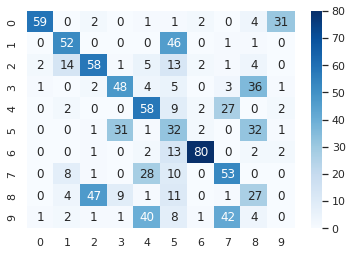

In [92]:
ax = sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues")

In [93]:
np.trace(cm2) / np.sum(cm2)

0.467

# QN 2

This time we will take 1,000 images from each of the 10 MNIST classes giving us 10,000 images. Build an autoencoder and train it.

In [94]:
# Nx10 data - 10 from each category

N=1000
X_train_1000, y_train_1000 = select_data(N, X_train_ori, y_train)
X_train_1000, y_train_1000 = prepare_data(X_train_1000, y_train_1000)
X_train_1000, y_train_1000 = shuffle_data(X_train_1000, y_train_1000, N)

X_train_1000 = X_train_1000.reshape(len(X_train_1000), -1)
X_train_1000.shape

(10000, 784)